### 1 Load libraries, define functions and load model

In [1]:
import numpy as np
import pandas as pd
import os
from os import listdir
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn.pipeline import make_pipeline, make_union
import math
from keras.utils import to_categorical
from keras.models import load_model
import h5py

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
os.chdir('../..')
from app.module import GestureTransformer, DataEnsembler

In [5]:
def plot_chart_predict(plots_per_row=30, body_part='leftWrist', date='20181127', file='all'):
    
    if file == 'all':
        file_names = listdir('app_local/model_inputs/')
    else:
        file_names = ['model_input_' + date + '_'+ file + '.csv']
    n = len(file_names)

    global movements
    
    kx = body_part + '_x'
    ky = body_part + '_y'
    
    for j in range(n // plots_per_row + 1):
        
        plt.figure(figsize=(2 * plots_per_row, 2))

        for i in range (plots_per_row):
            plt.subplot(1, plots_per_row, i + 1)
            index = j*plots_per_row + i
            
            # specify axes range
            axes = plt.gca()
            axes.set_xlim([-2,2])
            axes.set_ylim([-2,2])
            axes.get_yaxis().set_visible(False)
            axes.get_xaxis().set_visible(False)

            if index < n:

                df = pd.read_csv('app/model_inputs/' + file_names[index])

                feature_names = list(df.columns)
                feat_dict = {feature:feature_names.index(feature) for feature in feature_names}
                gt = GestureTransformer(byrow=True, feature_names=feature_names)

                D = df.values.reshape(1,18,16)
                D = gt.transform(D).reshape(18,16)
                Dx = D[:,feat_dict[kx]]
                Dy = D[:,feat_dict[ky]]    

                # movement
                l1, u1 = 0, 16
                plt.plot(Dx[l1:u1],Dy[l1:u1],color = "xkcd:baby blue")

                # current frame
                plt.plot(Dx[u1-1],Dy[u1-1],color = "xkcd:baby blue",marker = "o")
                
                plt.title(file_names[index].replace('model_input_' + date + '_','').replace('.csv',''))

        plt.show()
        plt.close()    

In [6]:
cols_x = ['leftShoulder_x',
          'rightShoulder_x',
          'leftWrist_x',
          'rightWrist_x',
          'leftHip_x',
          'rightHip_x',
          'leftElbow_x',
          'rightElbow_x']

cols_y = [col.replace('x', 'y') for col in cols_x]

cols = sorted(cols_x + cols_y)

In [7]:
model = load_model('models/model_gesture.h5')

### 2 Check movements stored when debugging training data generation

In [8]:
# set this to the date and file ID of the file in folder app/model_inputs
# these files get generated with generate_training_data.py

date = '20181201'
file = '112329121796'

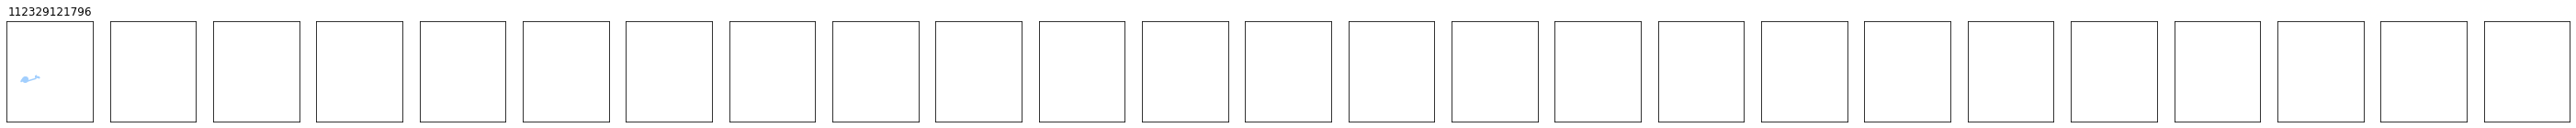

In [9]:
plot_chart_predict(plots_per_row=25, body_part='leftWrist', date=date, file=file)

In [10]:
pose_df = pd.read_csv('app/model_inputs/model_input_' + date + '_' + file + '.csv')

In [11]:
processing_pipeline = make_pipeline(GestureTransformer(byrow=True,feature_names=cols))
pose_np = pose_df.values.reshape(1, 18, len(cols))
pose_np[0][0]

array([687.40463791, 391.29489128, 510.94378401, 498.96146073,
       606.16288003, 167.00333215, 665.28915702, 409.1917123 ,
       295.44393695, 247.55471877, 411.57571162, 490.77377398,
       414.88279588,  98.68553676, 272.53038696, 359.85820711])

In [12]:
pose_np = processing_pipeline.fit_transform(pose_np)
pose_np[0][0]

array([-0.55663105, -0.21390582, -0.06920134, -0.51130824, -0.33222068,
        0.40564445, -0.49554248, -0.26334139,  0.52606398,  0.18314105,
        0.20527851, -0.48869176,  0.19614351,  0.59435555,  0.58935702,
       -0.12706971])

In [13]:
model.predict(pose_np)[0]

array([9.6417248e-01, 3.3536798e-03, 2.7037286e-05, 1.9888681e-05,
       1.1103527e-04, 2.8066510e-02, 4.2494405e-03], dtype=float32)

### 3 Check all take-off training data

#### 3.1 Load data

In [14]:
de = DataEnsembler(ms_per_frame=120)
de.investigate_available_datafiles(data_dir='data/gesture/', is_frame_based = True)
de.load_data()
de.assemble_data(tolerance_range=2)

In [15]:
de.display_information()

i: 0 	shape X: (603, 18, 16) 	shape y: (603,) 	count: 101
i: 1 	shape X: (519, 18, 16) 	shape y: (519,) 	count: 89
i: 2 	shape X: (498, 18, 16) 	shape y: (498,) 	count: 119
i: 3 	shape X: (650, 18, 16) 	shape y: (650,) 	count: 230
i: 4 	shape X: (508, 18, 16) 	shape y: (508,) 	count: 147
i: 5 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 146
i: 6 	shape X: (601, 18, 16) 	shape y: (601,) 	count: 159
i: 7 	shape X: (440, 18, 16) 	shape y: (440,) 	count: 127
i: 8 	shape X: (490, 18, 16) 	shape y: (490,) 	count: 110
i: 9 	shape X: (476, 18, 16) 	shape y: (476,) 	count: 118
i: 10 	shape X: (492, 18, 16) 	shape y: (492,) 	count: 121
i: 11 	shape X: (436, 18, 16) 	shape y: (436,) 	count: 87
i: 12 	shape X: (466, 18, 16) 	shape y: (466,) 	count: 126
i: 13 	shape X: (551, 18, 16) 	shape y: (551,) 	count: 127
i: 14 	shape X: (550, 18, 16) 	shape y: (550,) 	count: 114
i: 15 	shape X: (549, 18, 16) 	shape y: (549,) 	count: 115
i: 16 	shape X: (402, 18, 16) 	shape y: (402,) 	count: 160
i: 17 	sh

#### 3.2 Keep only data labelled as take-off

In [16]:
X = de.X.copy()
y = de.y.copy()

print("---------------------------------------------------------------------")
print("Shapes before removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels before removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")
    
keep_idx = np.concatenate([idx[1]])
keep_idx = sorted(keep_idx)

print("---------------------------------------------------------------------")
y = y[keep_idx]
X = X[keep_idx]
print("Shapes after removal of 'no movements':") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))
print("")

idx = []
for i in range(7):
    idx.append(np.where(np.isclose(y,i))[0])

print("Labels after removal of 'no movements'")
for i in range(7):
    print(i,len(idx[i]))
print("")

print("---------------------------------------------------------------------")
gt = GestureTransformer(feature_names = list(de.LabelGenerators[0].feature_names),byrow=True)
X = gt.transform(X)

y = to_categorical(y)

print("Shapes after transformation:") 
print("y: " + str(y.shape))
print("X: " + str(X.shape))

---------------------------------------------------------------------
Shapes before removal of 'no movements':
y: (20782,)
X: (20782, 18, 16)

Labels before removal of 'no movements'
0 15777
1 701
2 763
3 991
4 1042
5 819
6 689

---------------------------------------------------------------------
Shapes after removal of 'no movements':
y: (701,)
X: (701, 18, 16)

Labels after removal of 'no movements'
0 0
1 701
2 0
3 0
4 0
5 0
6 0

---------------------------------------------------------------------
Shapes after transformation:
y: (701, 2)
X: (701, 18, 16)


#### 3.3 Plot gesture alongside prediction

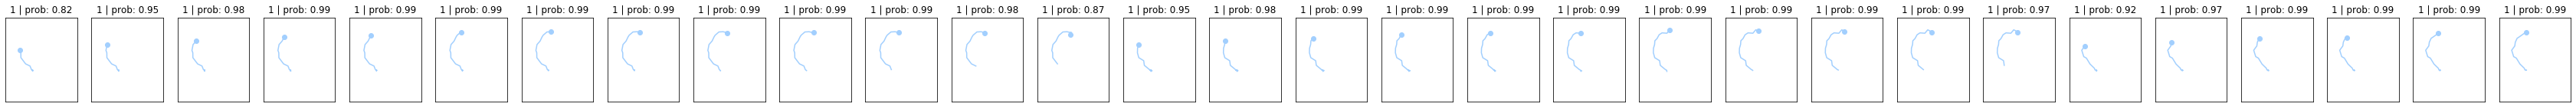

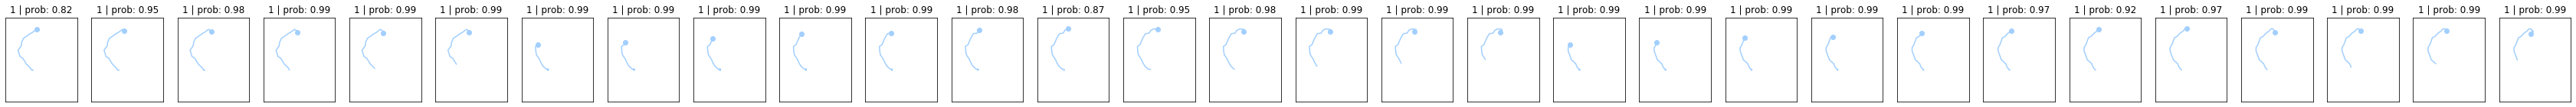

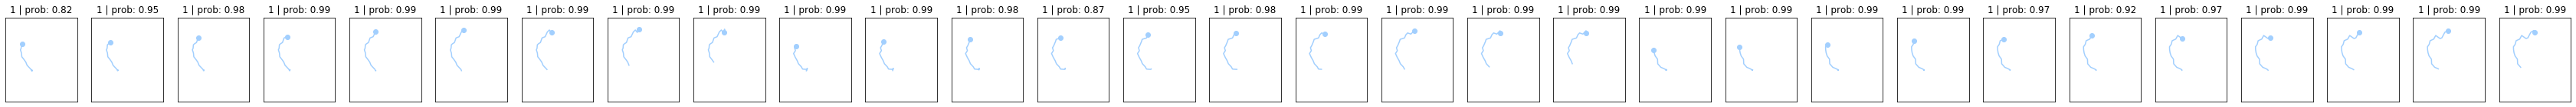

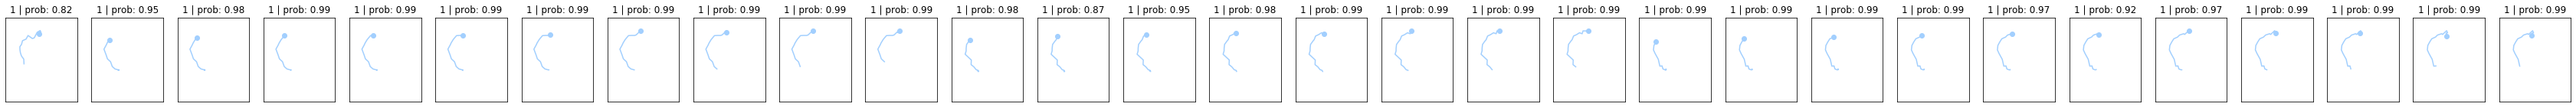

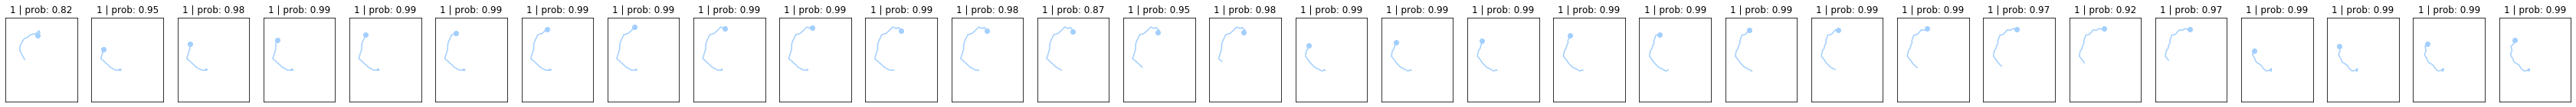

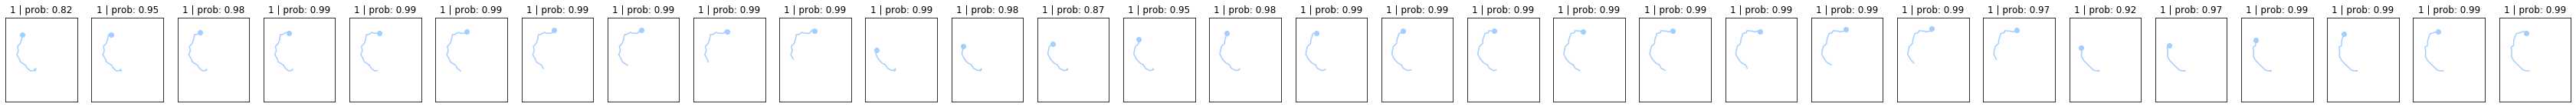

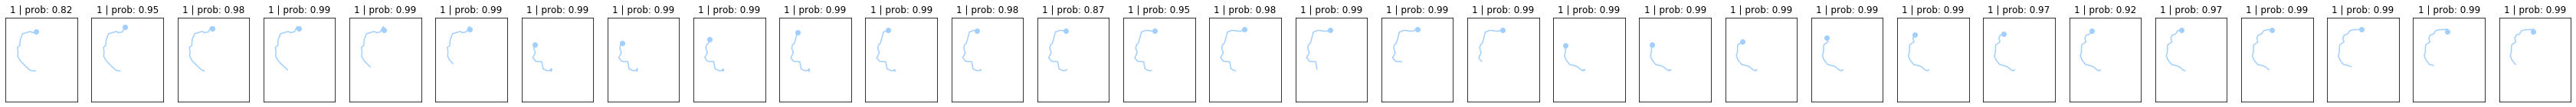

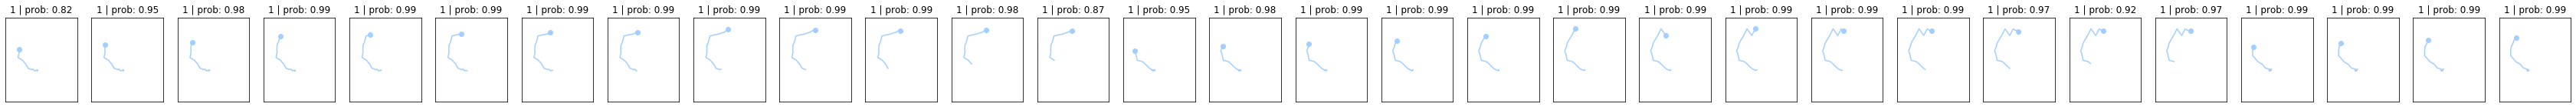

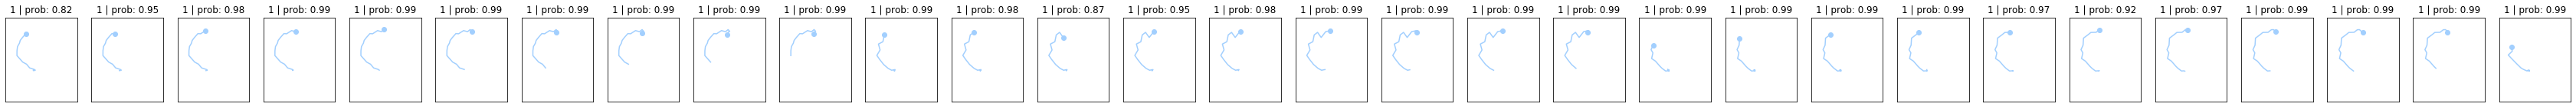

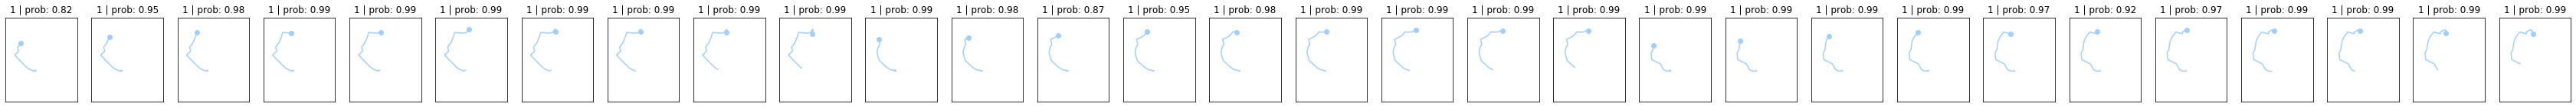

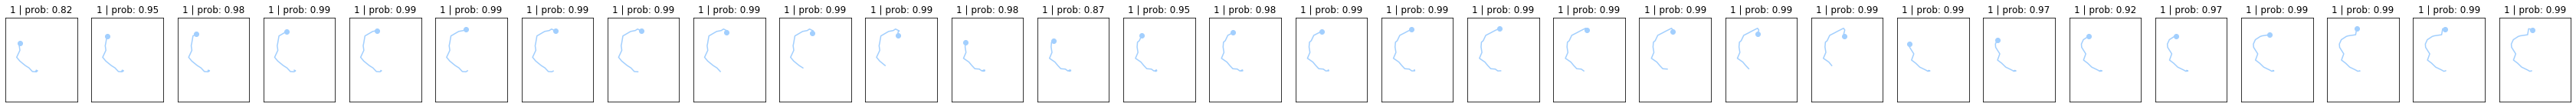

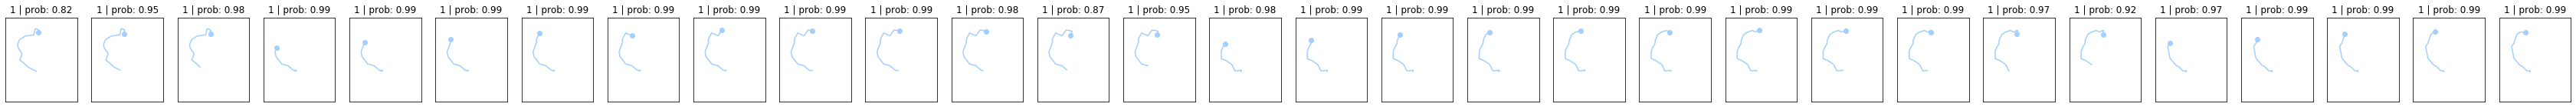

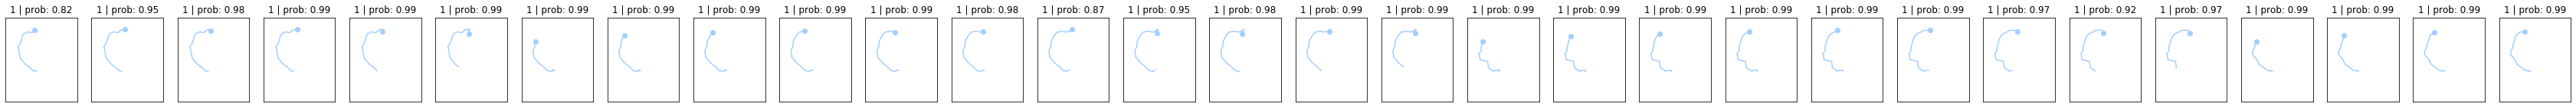

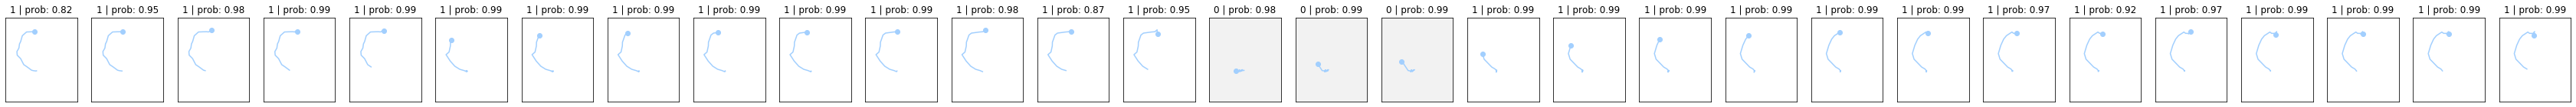

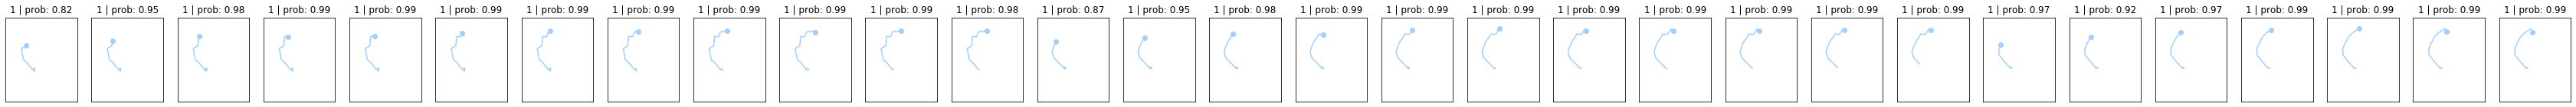

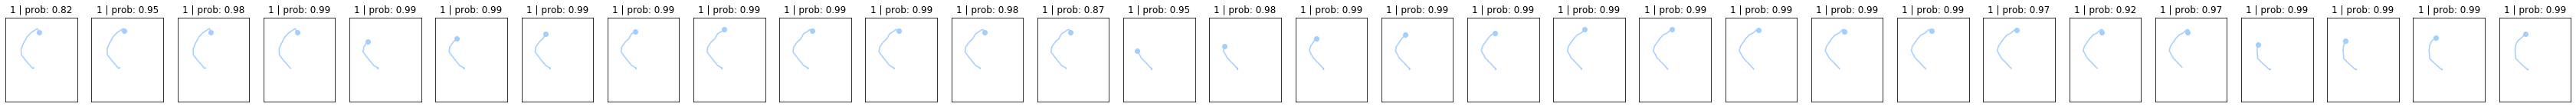

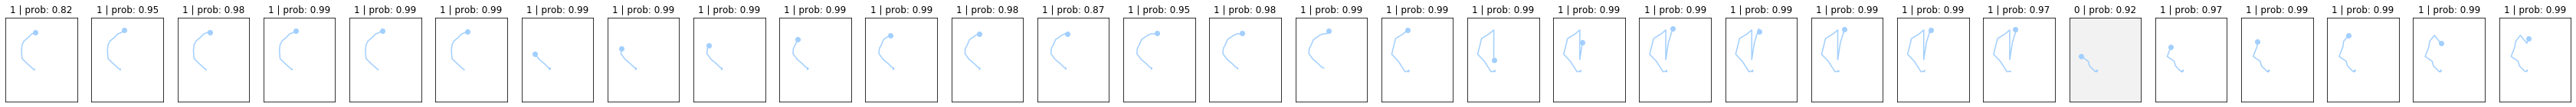

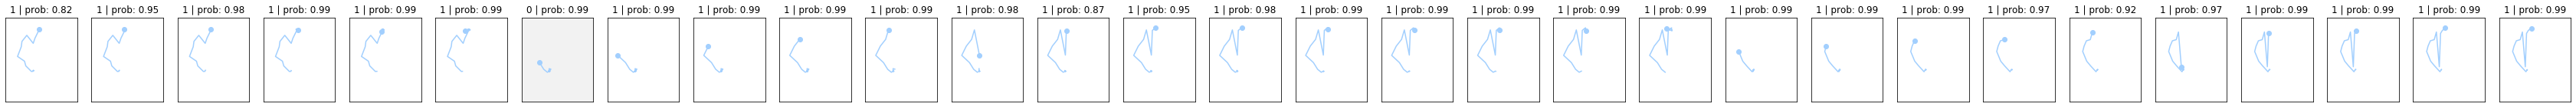

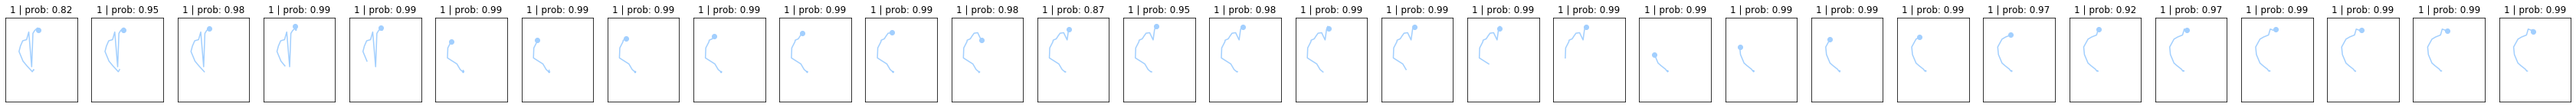

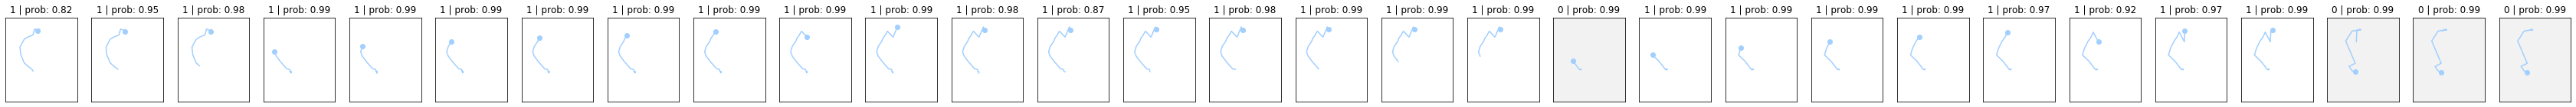

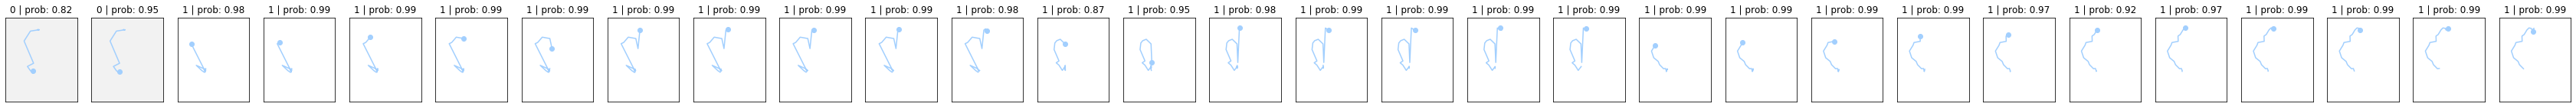

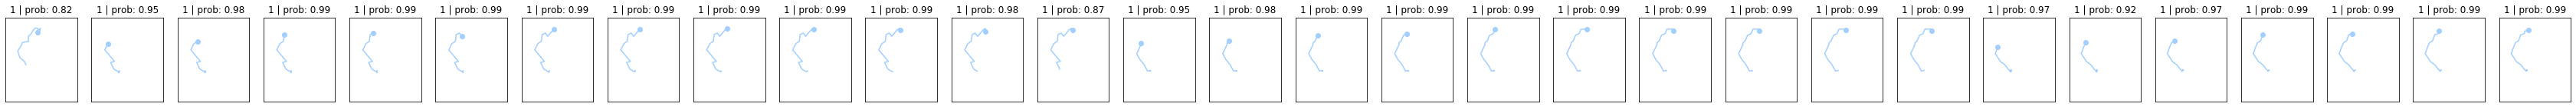

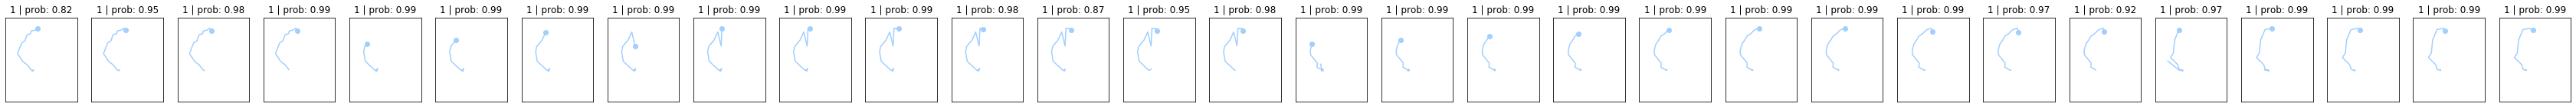

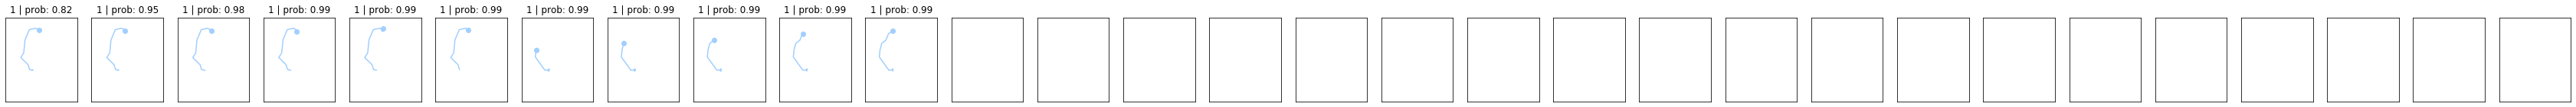

In [17]:
plots_per_row = 30
n = len(y)

body_part = 'leftWrist'
kx = body_part + '_x'
ky = body_part + '_y'

for j in range(n // plots_per_row + 1):
        
    plt.figure(figsize=(2 * plots_per_row, 2))

    for i in range (plots_per_row):
        plt.subplot(1, plots_per_row, i + 1)
        index = j*plots_per_row + i

        # specify axes range
        axes = plt.gca()
        axes.set_xlim([-2,2])
        axes.set_ylim([-2,2])
        axes.get_yaxis().set_visible(False)
        axes.get_xaxis().set_visible(False)

        if index < n:
            
            if (model.predict_classes(X[index:(index+1),:,:])[0])==0:
                axes.set_facecolor((0.95, 0.95, 0.95))

            feature_names = cols
            feat_dict = {feature:feature_names.index(feature) for feature in feature_names}
            gt = GestureTransformer(byrow=True, feature_names=feature_names)

            D = X[index]
            Dx = D[:,feat_dict[kx]]
            Dy = D[:,feat_dict[ky]]    

            # movement
            l1, u1 = 0, 16
            plt.plot(Dx[l1:u1],Dy[l1:u1],color = "xkcd:baby blue")

            # current frame
            plt.plot(Dx[u1-1],Dy[u1-1],color = "xkcd:baby blue",marker = "o")

            plt.title(str(model.predict_classes(X[index:(index+1),:,:])[0]) + ' | prob: ' + str(round(np.max(model.predict_proba(X[i:(i+1),:,:])),2)))

    plt.show()
    plt.close()    